In [22]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

#### Simple Linear regression Implementation

In [7]:
X = torch.randn(20).reshape(-1,1)

In [8]:
X.shape

torch.Size([20, 1])

In [15]:
WX = torch.mul(X,torch.randn(20).reshape(-1,1))

In [16]:
WX.shape

torch.Size([20, 1])

In [17]:
B = torch.randn(20).reshape(-1,1)

In [18]:
Y = torch.add(WX,B)

In [19]:
Y.shape

torch.Size([20, 1])

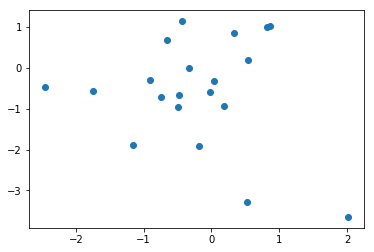

In [24]:
plt.scatter(X,Y)
plt.show()

In [40]:
class LinearRegression(nn.Module):
    
    def __init__(self,indim,outdim):
        
        super(LinearRegression,self).__init__()
        self.Linear = nn.Linear(indim,outdim,bias=False)
        
    
    def forward(self,X):
        
        out = self.Linear(X)
        return out

In [41]:
indim = 1
outdim = 1

In [42]:
lr = LinearRegression(indim,outdim)

In [43]:
mse = nn.MSELoss()
optim = torch.optim.SGD(lr.parameters(),lr=0.001)

In [60]:
epoc = 500

for i in range(epoc):
    
    Y_hat = lr.forward(X)
    optim.zero_grad()
    loss = mse(Y_hat,Y)
    loss.backward()
    optim.step()
    print("Epoc:{},Loss:{}".format(i,loss))

Epoc:0,Loss:2.3027234077453613
Epoc:1,Loss:2.301511764526367
Epoc:2,Loss:2.300304651260376
Epoc:3,Loss:2.299102544784546
Epoc:4,Loss:2.2979044914245605
Epoc:5,Loss:2.2967114448547363
Epoc:6,Loss:2.295522689819336
Epoc:7,Loss:2.2943387031555176
Epoc:8,Loss:2.293159246444702
Epoc:9,Loss:2.2919843196868896
Epoc:10,Loss:2.29081392288208
Epoc:11,Loss:2.2896480560302734
Epoc:12,Loss:2.2884864807128906
Epoc:13,Loss:2.2873294353485107
Epoc:14,Loss:2.286176919937134
Epoc:15,Loss:2.2850286960601807
Epoc:16,Loss:2.2838850021362305
Epoc:17,Loss:2.282745361328125
Epoc:18,Loss:2.2816104888916016
Epoc:19,Loss:2.280479907989502
Epoc:20,Loss:2.279353380203247
Epoc:21,Loss:2.278231382369995
Epoc:22,Loss:2.277113676071167
Epoc:23,Loss:2.2760002613067627
Epoc:24,Loss:2.2748911380767822
Epoc:25,Loss:2.2737860679626465
Epoc:26,Loss:2.2726855278015137
Epoc:27,Loss:2.2715890407562256
Epoc:28,Loss:2.2704970836639404
Epoc:29,Loss:2.269408941268921
Epoc:30,Loss:2.268324851989746
Epoc:31,Loss:2.267245292663574
Ep

In [61]:
Y_Pred = lr.forward(X)

In [62]:
Y_Pred

tensor([[-0.0593],
        [-0.0019],
        [-0.1428],
        [-0.1120],
        [-0.2160],
        [-0.0612],
        [-0.3046],
        [-0.0922],
        [-0.0409],
        [ 0.0056],
        [ 0.0410],
        [ 0.0673],
        [ 0.2495],
        [ 0.1064],
        [-0.0224],
        [-0.0542],
        [ 0.0233],
        [ 0.0648],
        [ 0.1022],
        [-0.0819]], grad_fn=<MmBackward>)

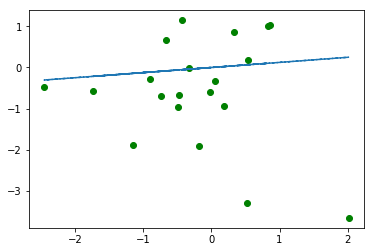

In [63]:
plt.plot(X.numpy(),Y.numpy(),'go',label='True Data')
plt.plot(X.numpy(),Y_Pred.detach().numpy(),'--',label='Pred Data')
plt.show()